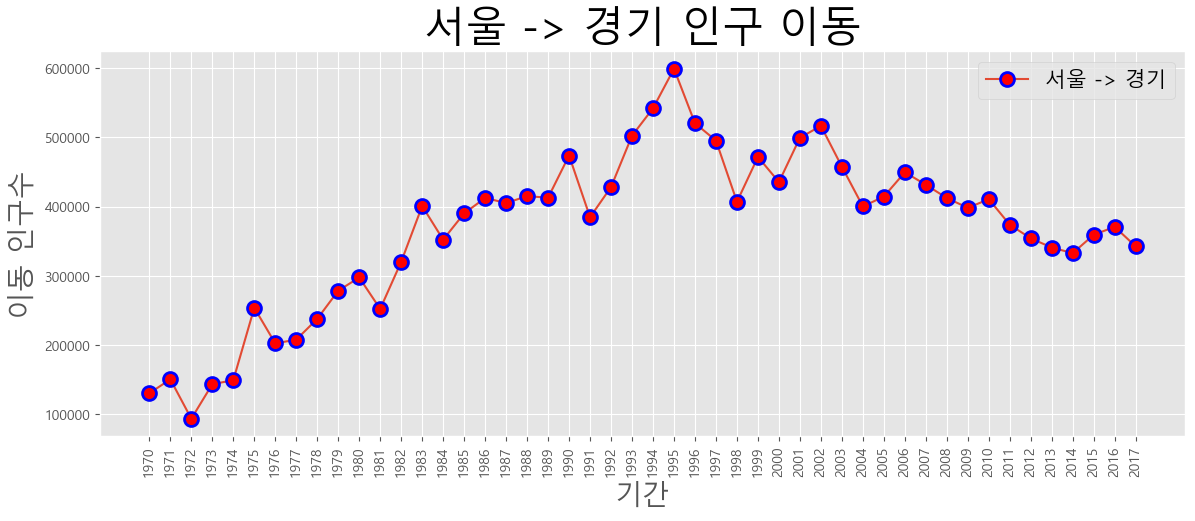

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_path="./data/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul

sr_one=df_seoul.loc['경기도']

plt.style.use('ggplot')

plt.figure(figsize=(14,5))

plt.xticks(size=10,rotation='vertical')

plt.plot(sr_one.index,sr_one.values,
         marker='o', markerfacecolor='red',markeredgecolor='blue',markeredgewidth=2,markersize=10)

plt.title('서울 -> 경기 인구 이동',size=30)
plt.xlabel('기간',size=20)
plt.ylabel('이동 인구수',size=20)

plt.legend(labels=['서울 -> 경기'],loc='best',fontsize=15)

plt.show()